In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from physical_parameters_SciNet.model_instances.n2_setting_mast_constant_time import config

from physical_parameters_SciNet.utils.mast_scinet_evaluation import load_trained_model, full_inference, plot_latent_variables, plot_reconstructions_answers_observations
from physical_parameters_SciNet.utils.build_dataset import mast_dataset
from torch.utils.data import DataLoader
from physical_parameters_SciNet.model.scinet import PendulumNet

In [3]:
x = torch.randn(16, 200)
print(x.shape)

x = torch.max(x, dim=1).values
print(x.shape)

x = torch.mean(x)
print(x.shape)
print(x)

x = x.item()
print(x)

torch.Size([16, 200])
torch.Size([16])
torch.Size([])
tensor(2.6863)
2.6862823963165283


In [7]:
device = config.DEVICE

# Load model
model_path = config.DIR_PARAMS_CHANNEL / f"{config.BEST_MODEL_NAME}.pth"
pendulum_net = load_trained_model(model_path, device)

# Load test dataset
path = config.DIR_PREPROCESSED_DATA / f"{config.MODEL_NAME}_test_dataset.pt"
test_dataset = torch.load(path, weights_only=False)
test_loader = DataLoader(test_dataset, batch_size=config.BATCH_SIZE_EVAL, shuffle=True)

# Load normalization stats
path = config.DIR_OTHERS_DATA_CHANNEL / f"{config.MODEL_NAME}_normalization_stats.pt"
normalization_stats = torch.load(path)

# Full inference on test set
reconstructions, means, logvars, all_observations, all_questions, all_answers = full_inference(pendulum_net, test_loader, normalization_stats, device)



/home/ITER/brussel/Documents/ITER-physical-parameters-with-SciNet/src/physical_parameters_SciNet/utils/mast_scinet_evaluation.py:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental featu

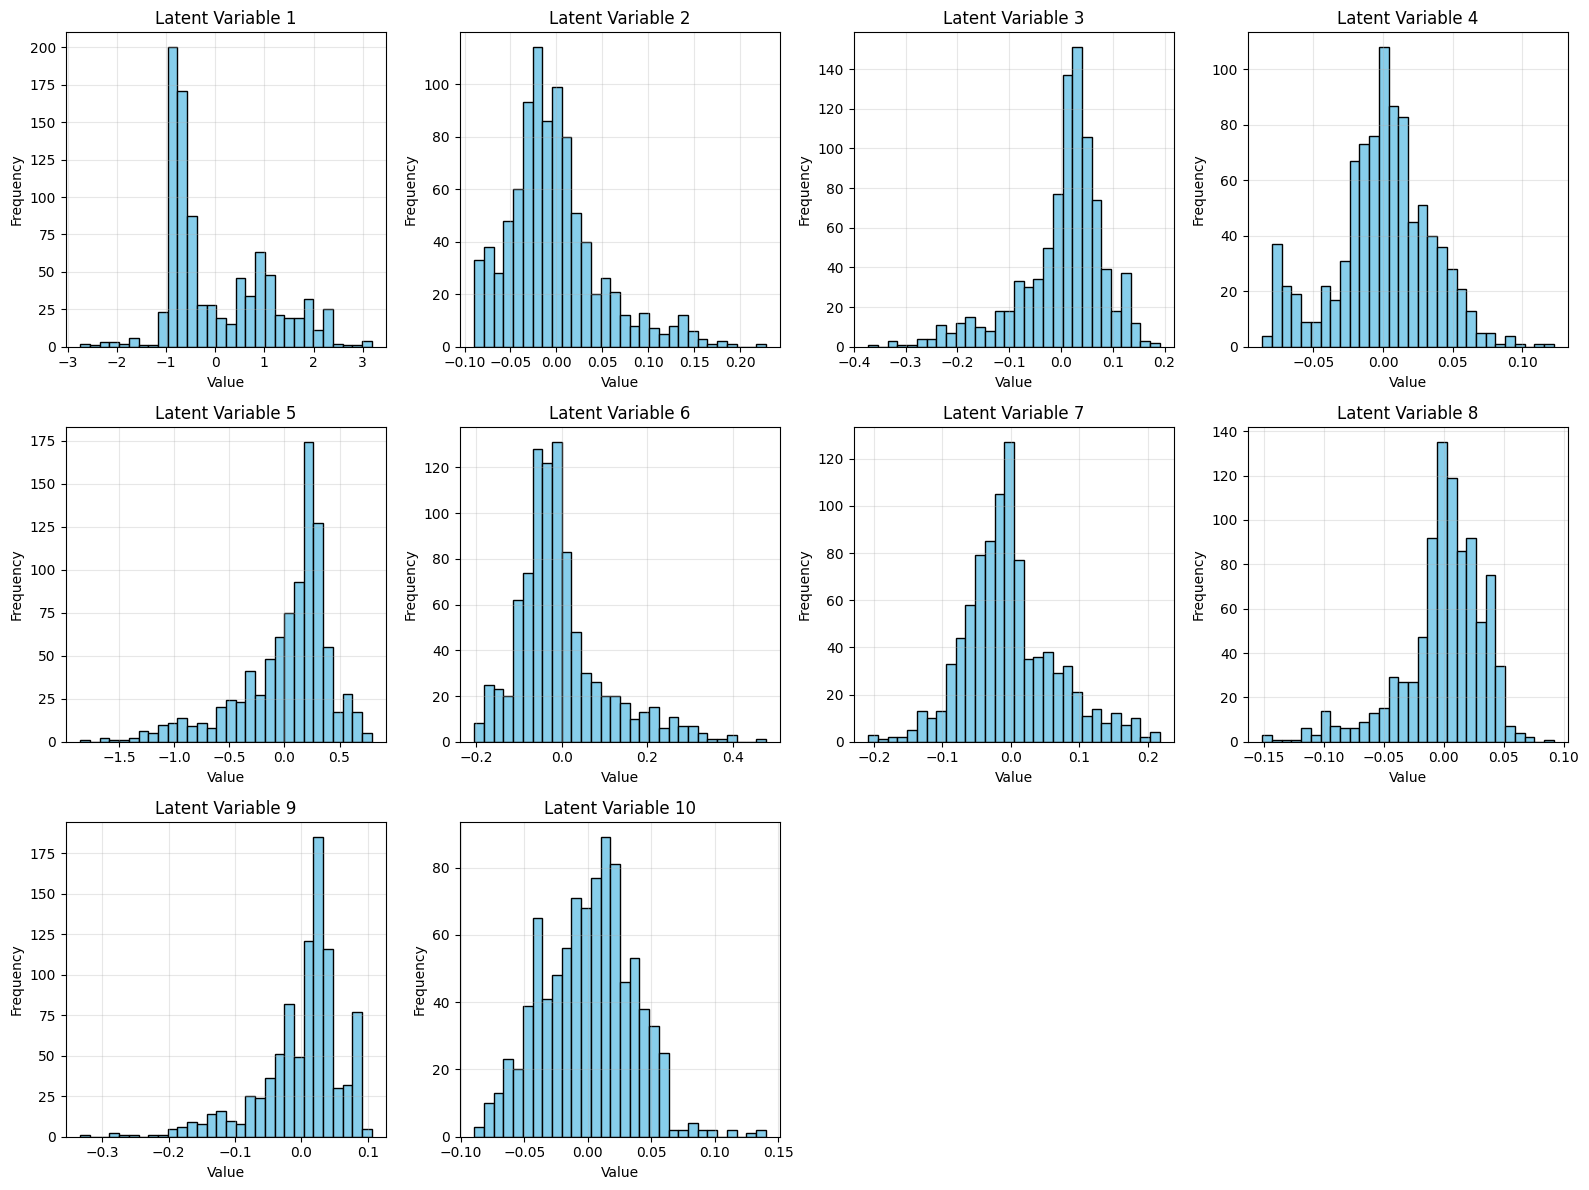

In [9]:
# Plot latent variables distributions
plot_latent_variables(means, n_max_cols=4)

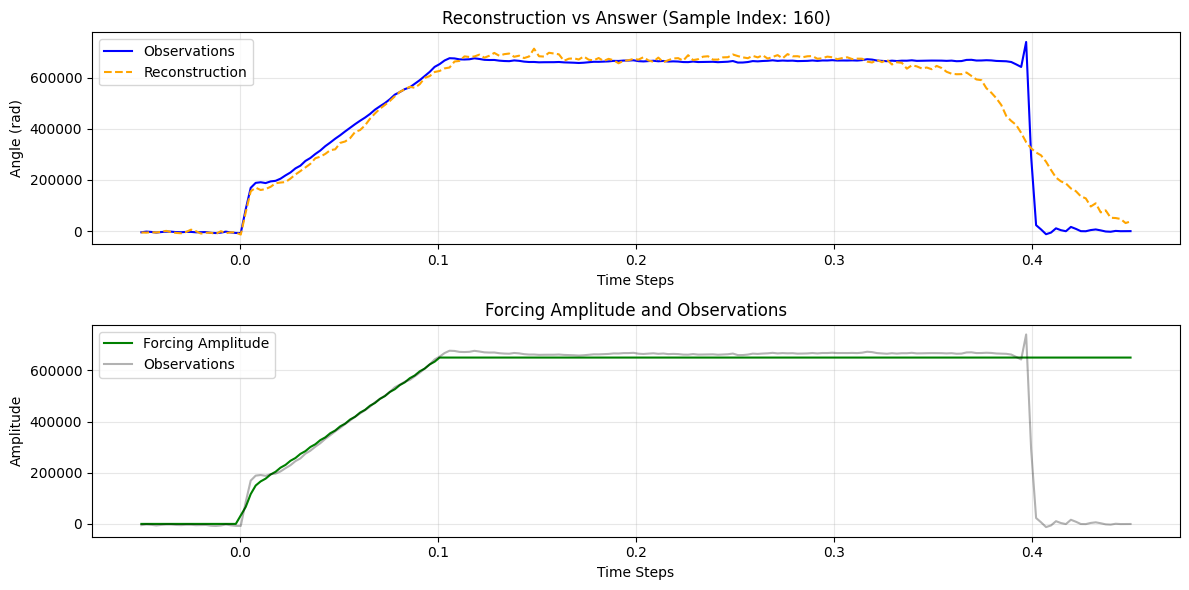

In [40]:
# Plot a random reconstruction
sample_idx = np.random.choice(config.TEST_SIZE)
plot_reconstructions_answers_observations(
    observations=all_observations, 
    reconstructions=reconstructions, 
    questions=all_questions, 
    sample_idx=sample_idx
)